In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("Desktop\Airport_Traffic.xlsx",sheet_name="DATA")

In [4]:
df.head()


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,2016-01-01,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,2016-01-01,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,2016-01-01,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,2016-01-01,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,2016-01-01,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [5]:
df.tail()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
802046,2023,5,MAY,2023-05-31,LYBE,Belgrade - Nikola Tesla,Serbia,127,123,250,NaN,NaN,NaN,Belgrade - Nikola Tesla (LYBE)
802047,2023,5,MAY,2023-05-31,LYPG,Podgorica,Montenegro,16,18,34,NaN,NaN,NaN,Podgorica (LYPG)
802048,2023,5,MAY,2023-05-31,LZIB,Bratislava,Slovakia,34,35,69,34.0,30.0,64.0,Bratislava (LZIB)
802049,2023,5,MAY,2023-05-31,UDYZ,Yerevan,Armenia,58,62,120,NaN,NaN,NaN,Yerevan (UDYZ)
802050,2023,5,MAY,2023-05-31,UGTB,Tbilisi,Georgia,39,40,79,NaN,NaN,NaN,Tbilisi (UGTB)


In [6]:
df.STATE_NAME.unique()

array(['Belgium', 'Germany', 'Estonia', 'Finland', 'United Kingdom',
       'Netherlands', 'Ireland', 'Denmark', 'Luxembourg', 'Norway',
       'Poland', 'Sweden', 'Latvia', 'Lithuania', 'Spain', 'Albania',
       'Bulgaria', 'Cyprus', 'Croatia', 'France', 'Greece', 'Hungary',
       'Italy', 'Slovenia', 'Czech Republic', 'Malta', 'Austria',
       'Portugal', 'Bosnia and Herzegovina', 'Romania', 'Switzerland',
       'Türkiye', 'Moldova', 'Republic of North Macedonia', 'Serbia',
       'Montenegro', 'Slovakia', 'Armenia', 'Georgia', 'Ukraine',
       'Morocco', 'Israel'], dtype=object)

In [7]:
df[df.duplicated()]

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
640877,2022,1,JAN,2022-01-01,EBAW,Antwerp,Belgium,9,8,17,NaN,NaN,NaN,Antwerp (EBAW)


In [8]:
df.columns

Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
       'STATE_NAME', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2',
       'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2', 'Pivot Label'],
      dtype='object')

In [9]:
df.rename(columns={"Pivot Label":"Pivot_label"},inplace=True)

In [10]:
df.columns

Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
       'STATE_NAME', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2',
       'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2', 'Pivot_label'],
      dtype='object')

In [11]:
df.Pivot_label.unique()

array(['Antwerp (EBAW)', 'Brussels (EBBR)', 'Charleroi (EBCI)',
       'Liège (EBLG)', 'Ostend-Bruges (EBOS)',
       'Berlin - Brandenburg (EDDB)', 'Dresden (EDDC)', 'Erfurt (EDDE)',
       'Frankfurt (EDDF)', 'Muenster-Osnabrueck (EDDG)', 'Hamburg (EDDH)',
       'Cologne-Bonn (EDDK)', 'Dusseldorf (EDDL)', 'Munich (EDDM)',
       'Nuremberg (EDDN)', 'Leipzig-Halle (EDDP)', 'Saarbruecken (EDDR)',
       'Stuttgart (EDDS)', 'Berlin - Tegel (EDDT)', 'Hanover (EDDV)',
       'Bremen (EDDW)', 'Tallinn (EETN)', 'Tartu (EETU)',
       'Helsinki - Vantaa (EFHK)', 'Belfast - Aldergrove (EGAA)',
       'Belfast - City Airport (EGAC)', 'Londonderry - Eglinton (EGAE)',
       'Birmingham (EGBB)', 'Manchester (EGCC)', 'Bristol (EGGD)',
       'London - Luton (EGGW)', 'Southampton (EGHI)',
       'Biggin Hill (EGKB)', 'London - Gatwick (EGKK)',
       'London - City (EGLC)', 'Farnborough (EGLF)',
       'London - Heathrow (EGLL)', 'East Midlands (EGNX)',
       'Aberdeen (EGPD)', 'Glasgow (EGPF)',

In [12]:
df2=df[(df["FLT_DATE"]>="2022-01-01")&(df["FLT_DATE"]<="2022-12-31")]

df2.head()

In [13]:
df2=df2.reset_index()
del[df2["index"]]


In [14]:
df2.columns

Index(['YEAR', 'MONTH_NUM', 'MONTH_MON', 'FLT_DATE', 'APT_ICAO', 'APT_NAME',
       'STATE_NAME', 'FLT_DEP_1', 'FLT_ARR_1', 'FLT_TOT_1', 'FLT_DEP_IFR_2',
       'FLT_ARR_IFR_2', 'FLT_TOT_IFR_2', 'Pivot_label'],
      dtype='object')

In [15]:
df2.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot_label
0,2022,1,JAN,2022-01-01,EBAW,Antwerp,Belgium,9,8,17,NaN,NaN,NaN,Antwerp (EBAW)
1,2022,1,JAN,2022-01-01,EBAW,Antwerp,Belgium,9,8,17,NaN,NaN,NaN,Antwerp (EBAW)
2,2022,1,JAN,2022-01-01,EBBR,Brussels,Belgium,148,150,298,148.0,150.0,298.0,Brussels (EBBR)
3,2022,1,JAN,2022-01-01,EBCI,Charleroi,Belgium,54,54,108,54.0,54.0,108.0,Charleroi (EBCI)
4,2022,1,JAN,2022-01-01,EBLG,Liège,Belgium,28,24,52,NaN,NaN,NaN,Liège (EBLG)


In [16]:
df2.isnull().sum()

YEAR                 0
MONTH_NUM            0
MONTH_MON            0
FLT_DATE             0
APT_ICAO             0
APT_NAME             0
STATE_NAME           0
FLT_DEP_1            0
FLT_ARR_1            0
FLT_TOT_1            0
FLT_DEP_IFR_2    82960
FLT_ARR_IFR_2    82960
FLT_TOT_IFR_2    82960
Pivot_label          0
dtype: int64

In [17]:
df2["FLT_DATE"].tail(20)

114077   2022-12-31
114078   2022-12-31
114079   2022-12-31
114080   2022-12-31
114081   2022-12-31
114082   2022-12-31
114083   2022-12-31
114084   2022-12-31
114085   2022-12-31
114086   2022-12-31
114087   2022-12-31
114088   2022-12-31
114089   2022-12-31
114090   2022-12-31
114091   2022-12-31
114092   2022-12-31
114093   2022-12-31
114094   2022-12-31
114095   2022-12-31
114096   2022-12-31
Name: FLT_DATE, dtype: datetime64[ns]

In [18]:
df2.drop_duplicates(inplace=True)

In [19]:
Country_flight=df2.groupby(["STATE_NAME"])[["FLT_TOT_1"]].sum().sort_values("FLT_TOT_1",ascending=False)

In [20]:
Country_flight.head()

,FLT_TOT_1
STATE_NAME,
Spain,1954144
United Kingdom,1680130
France,1599812
Germany,1483139
Italy,1114499


In [21]:
Country_flight

,FLT_TOT_1
STATE_NAME,
Spain,1954144
United Kingdom,1680130
France,1599812
Germany,1483139
Italy,1114499
Türkiye,954690
Norway,667989
Greece,509807
Netherlands,465875


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114096 entries, 0 to 114096
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   YEAR           114096 non-null  int64         
 1   MONTH_NUM      114096 non-null  int64         
 2   MONTH_MON      114096 non-null  object        
 3   FLT_DATE       114096 non-null  datetime64[ns]
 4   APT_ICAO       114096 non-null  object        
 5   APT_NAME       114096 non-null  object        
 6   STATE_NAME     114096 non-null  object        
 7   FLT_DEP_1      114096 non-null  int64         
 8   FLT_ARR_1      114096 non-null  int64         
 9   FLT_TOT_1      114096 non-null  int64         
 10  FLT_DEP_IFR_2  31137 non-null   float64       
 11  FLT_ARR_IFR_2  31137 non-null   float64       
 12  FLT_TOT_IFR_2  31137 non-null   float64       
 13  Pivot_label    114096 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(5

In [23]:
airport_flight=df2.groupby(["Pivot_label"])[["FLT_TOT_1"]].sum().sort_values("FLT_TOT_1",ascending=False)

In [24]:
airport_flight

,FLT_TOT_1
Pivot_label,
iGA Istanbul Airport (LTFM),422062
Amsterdam - Schiphol (EHAM),415813
Paris-Charles-de-Gaulle (LFPG),409376
Frankfurt (EDDF),382135
London - Heathrow (EGLL),380384
...,...
Murcia San Javier (LELC),152
Palma - Son San Juan (LESJ),75
Sligo (EISG),50


In [25]:
airport_flight.head(15)

,FLT_TOT_1
Pivot_label,
iGA Istanbul Airport (LTFM),422062
Amsterdam - Schiphol (EHAM),415813
Paris-Charles-de-Gaulle (LFPG),409376
Frankfurt (EDDF),382135
London - Heathrow (EGLL),380384
Madrid - Barajas (LEMD),351953
Barcelona (LEBL),283444
Munich (EDDM),282102
Palma de Mallorca (LEPA),220145


In [26]:
airport_flight_mean=df2.groupby(["Pivot_label"])[["FLT_TOT_1"]].mean().sort_values("FLT_TOT_1",ascending=False)

In [27]:
airport_flight_mean.head(15)

,FLT_TOT_1
Pivot_label,
iGA Istanbul Airport (LTFM),1156.334247
Amsterdam - Schiphol (EHAM),1139.213699
Paris-Charles-de-Gaulle (LFPG),1121.578082
Frankfurt (EDDF),1046.945205
London - Heathrow (EGLL),1042.147945
Madrid - Barajas (LEMD),964.254795
Barcelona (LEBL),776.558904
Munich (EDDM),772.882192
Palma de Mallorca (LEPA),603.136986


In [28]:
Country_flight_mean=df2.groupby(["STATE_NAME"])[["FLT_TOT_1"]].mean().sort_values("FLT_TOT_1",ascending=False)

In [29]:
Country_flight_mean.head(15)

,FLT_TOT_1
STATE_NAME,
Denmark,554.000000
Türkiye,436.329982
Israel,393.915068
Finland,363.564384
Switzerland,345.363385
Germany,271.936010
Hungary,268.443836
Netherlands,257.531786
United Kingdom,242.583021


In [30]:
df3=df[(df["FLT_DATE"]>="2018-01-01")&(df["FLT_DATE"]<="2023-5-31")]

In [31]:
df3.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot_label
193186,2018,1,JAN,2018-01-01,EBAW,Antwerp,Belgium,4,5,9,NaN,NaN,NaN,Antwerp (EBAW)
193187,2018,1,JAN,2018-01-01,EBBR,Brussels,Belgium,211,204,415,212.0,207.0,419.0,Brussels (EBBR)
193188,2018,1,JAN,2018-01-01,EBCI,Charleroi,Belgium,51,53,104,51.0,53.0,104.0,Charleroi (EBCI)
193189,2018,1,JAN,2018-01-01,EBLG,Liège,Belgium,10,16,26,NaN,NaN,NaN,Liège (EBLG)
193190,2018,1,JAN,2018-01-01,EBOS,Ostend-Bruges,Belgium,4,2,6,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [32]:
df3=df3.reset_index()
del[df3["index"]]

In [33]:
df3.tail(5)

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot_label
608860,2023,5,MAY,2023-05-31,LYBE,Belgrade - Nikola Tesla,Serbia,127,123,250,NaN,NaN,NaN,Belgrade - Nikola Tesla (LYBE)
608861,2023,5,MAY,2023-05-31,LYPG,Podgorica,Montenegro,16,18,34,NaN,NaN,NaN,Podgorica (LYPG)
608862,2023,5,MAY,2023-05-31,LZIB,Bratislava,Slovakia,34,35,69,34.0,30.0,64.0,Bratislava (LZIB)
608863,2023,5,MAY,2023-05-31,UDYZ,Yerevan,Armenia,58,62,120,NaN,NaN,NaN,Yerevan (UDYZ)
608864,2023,5,MAY,2023-05-31,UGTB,Tbilisi,Georgia,39,40,79,NaN,NaN,NaN,Tbilisi (UGTB)


In [34]:
df3[df3.duplicated()]

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot_label
447691,2022,1,JAN,2022-01-01,EBAW,Antwerp,Belgium,9,8,17,NaN,NaN,NaN,Antwerp (EBAW)


In [35]:

df3.drop_duplicates(inplace=True)

In [36]:
flightsbydate=df3.groupby(["YEAR","STATE_NAME","Pivot_label"])[["FLT_TOT_1"]].mean().sort_values("YEAR")

In [37]:
flightsbydate.head(20)

FLT_TOT_1
YEAR STATE_NAME Pivot_label                               
2018 Albania    Tirana (LATI)                    69.904110
     Poland     Zielona Gora - Babimost (EPZG)    2.478992
                Wroclaw - Strachowice (EPWR)     84.772603
                Warszawa - Modlin (EPMO)         54.145604
                Warszawa - Chopina (EPWA)       512.972603
                Szczecin - Goleniów (EPSC)       16.989041
                Rzeszow - Jasionka (EPRZ)        25.380822
                Radom (EPRA)                      3.441989
     Portugal   Cascais (LPCS)                   13.463014
     Poland     Poznan - Lawica (EPPO)           66.824658
                Lublin (EPLB)                    11.728767
                Lodz - Lublinek (EPLL)           10.309589
                Krakow - Balice (EPKK)          150.531507
                Katowice - Pyrzowice (EPKT)     102.745205
                Gdansk (EPGD)                   118.167123
                Bydgoszcz (EPBY)                 11.450549
     Norway     Værøy (ENVR)                      3.379888
     Poland     Olsztyn-Mazury (EPSY)             4.632911
     Portugal   Faro (LPFR)                     162.115068
                Flores (LPFL)                     5.029674

In [38]:
flightssbydate=df3.groupby(["YEAR","STATE_NAME"])[["FLT_TOT_1"]].mean().sort_values(["YEAR","FLT_TOT_1"],ascending=[True,False])

In [39]:
flightssbydate.head(20)

FLT_TOT_1
YEAR STATE_NAME                
2018 Denmark         729.334247
     Türkiye         565.012176
     Finland         527.380822
     Israel          428.564384
     Switzerland     418.901280
     Germany         364.760404
     Sweden          338.673973
     Hungary         313.627397
     Netherlands     310.341828
     United Kingdom  306.922044
     Ukraine         266.432877
     Italy           253.900654
     Luxembourg      205.136986
     Belgium         186.169863
     Serbia          182.098630
     Romania         175.501377
     Bulgaria        163.232877
     Austria         156.772146
     Malta           155.254795
     Czech Republic  121.885305

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [41]:
flightssbydate.tail(9)

FLT_TOT_1
YEAR STATE_NAME                            
2023 Moldova                      54.430464
     Republic of North Macedonia  48.887417
     Norway                       42.906844
     Slovakia                     39.456954
     Lithuania                    34.713101
     Montenegro                   31.615894
     Bosnia and Herzegovina       29.543046
     Slovenia                     20.848921
     Ukraine                       0.000000

In [42]:
flightssbyYear=df3.groupby(["YEAR"])[["FLT_TOT_1"]].mean().sort_values(["YEAR","FLT_TOT_1"],ascending=[True,False])

In [43]:
flightssbyYear

,FLT_TOT_1
YEAR,
2018,150.001921
2019,150.786673
2020,69.282294
2021,81.741020
2022,125.832238
2023,125.221016


In [44]:
flightssbyMonth=df3.groupby(["YEAR","MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values(["YEAR","MONTH_NUM"],ascending=[True,True])

In [45]:
flightssbyMonth

FLT_TOT_1
YEAR MONTH_NUM            
2018 1          124.987028
     2          128.739933
     3          135.821283
     4          148.977555
     5          156.115749
...                    ...
2023 1          109.882538
     2          114.108434
     3          119.132729
     4          136.426880
     5          145.440968

[65 rows x 1 columns]

In [46]:
year1=df3[df3.YEAR==2018].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values("MONTH_NUM")

In [47]:
df3.YEAR.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [48]:
year2=df3[df3.YEAR==2019].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values("MONTH_NUM")
year3=df3[df3.YEAR==2020].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values("MONTH_NUM")
year4=df3[df3.YEAR==2021].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values("MONTH_NUM")
year5=df3[df3.YEAR==2022].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values("MONTH_NUM")


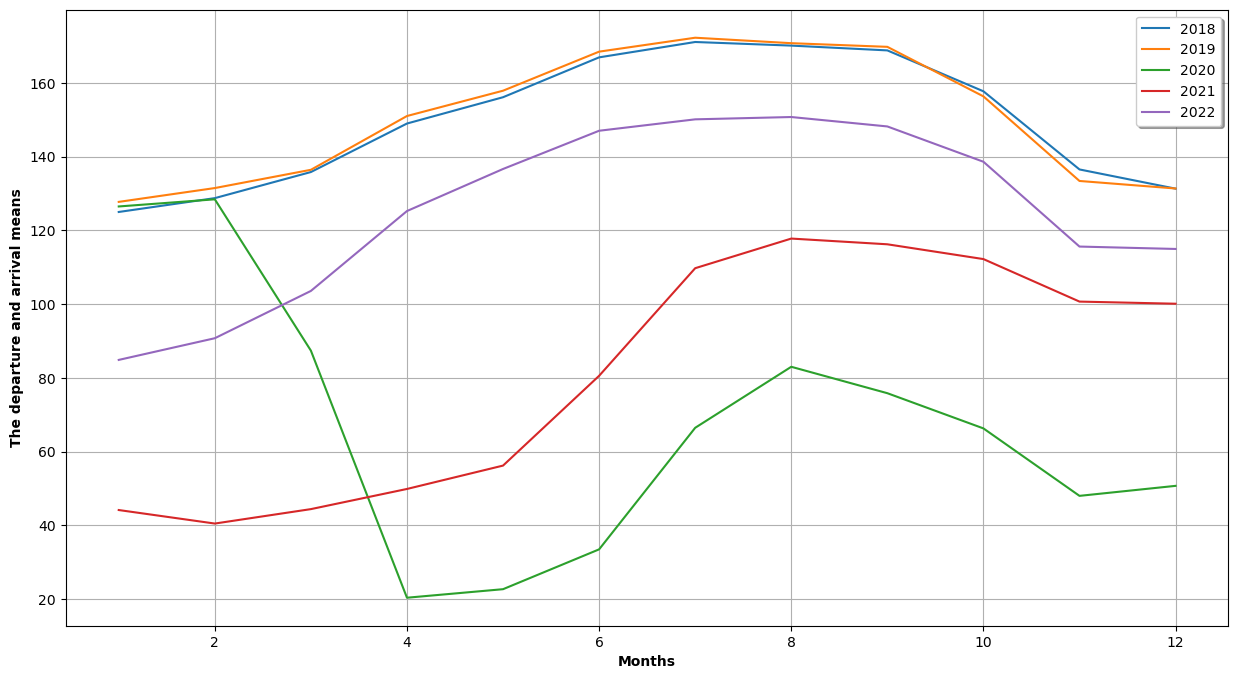

In [49]:
plt.figure(figsize=[15,8])
plt.plot(year1)
plt.plot(year2)
plt.plot(year3)
plt.plot(year4)
plt.plot(year5)
plt.legend(["2018","2019","2020","2021","2022"],shadow=True);
plt.grid()
plt.xlabel("Months",weight="bold");
plt.ylabel("The departure and arrival means",weight="bold");

In [50]:
year11=df3[df3.YEAR==2018].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
year22=df3[df3.YEAR==2019].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
year33=df3[df3.YEAR==2020].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
year44=df3[df3.YEAR==2021].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
year55=df3[df3.YEAR==2022].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")


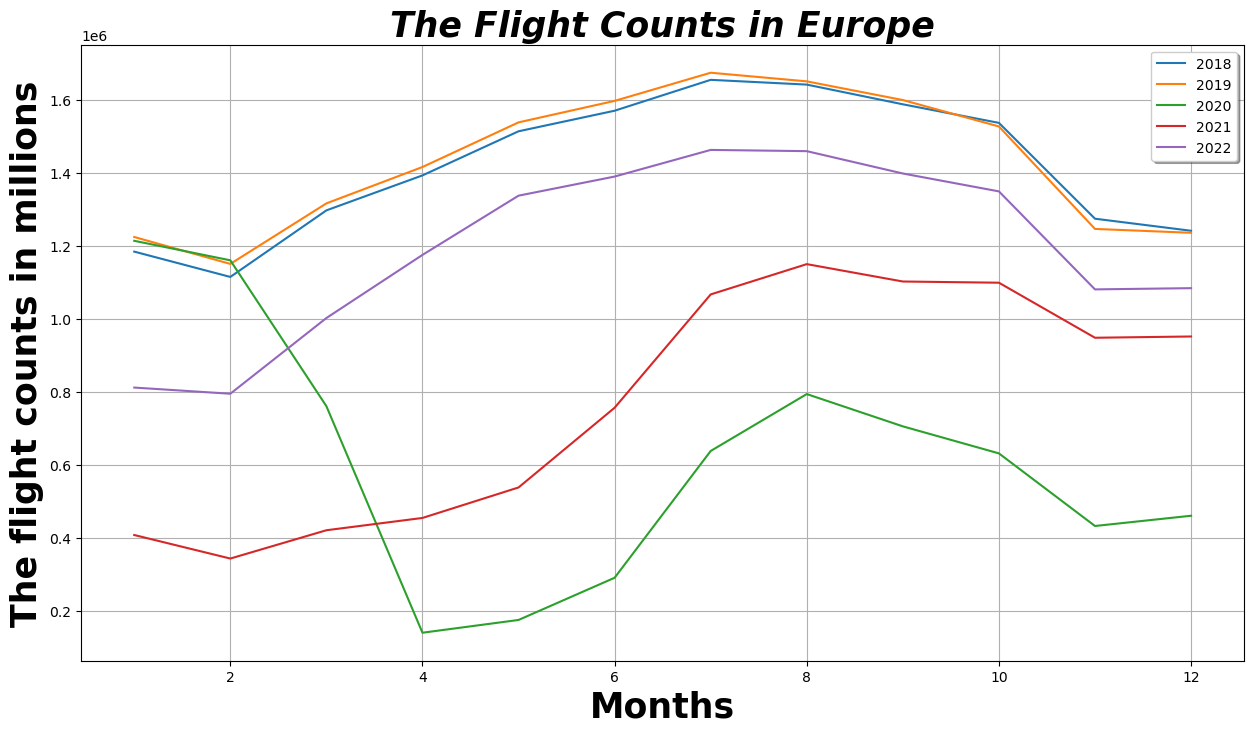

In [51]:
plt.figure(figsize=[15,8])
plt.plot(year11)
plt.plot(year22)
plt.plot(year33)
plt.plot(year44)
plt.plot(year55)
plt.legend(["2018","2019","2020","2021","2022"],shadow=True);
plt.grid()
plt.xlabel("Months",weight="bold",fontsize="25");
plt.ylabel("The flight counts in millions",weight="bold",fontsize="25");
plt.title("The Flight Counts in Europe",weight="bold",style="italic",fontsize="25");

In [52]:
country=Country_flight.head(6)

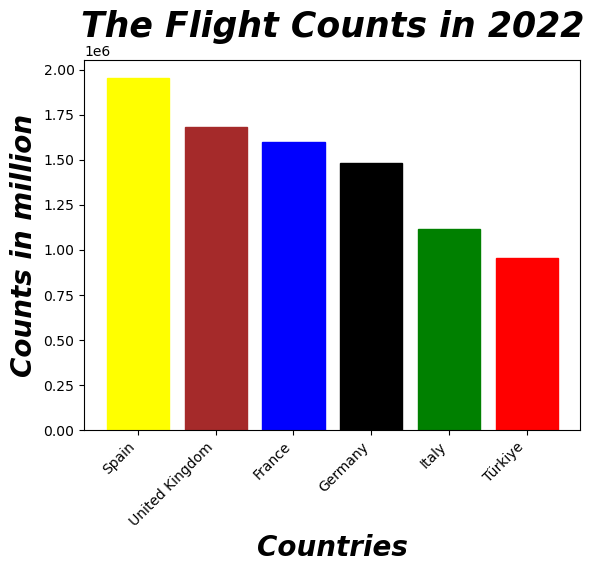

In [53]:
f=plt.bar(country.index,country.FLT_TOT_1,data=country,);
plt.title("The Flight Counts in 2022",weight="bold",style="italic",fontsize="25");
plt.xlabel("Countries",weight="bold",style="italic",fontsize="20");
plt.ylabel("Counts in million",weight="bold",style="italic",fontsize="20");
plt.xticks(rotation=45,ha="right");
f[0].set_color("yellow")
f[1].set_color("brown")
f[2].set_color("blue")
f[3].set_color("black")
f[4].set_color("green")
f[5].set_color("red")
plt.show()

In [54]:
country


,FLT_TOT_1
STATE_NAME,
Spain,1954144
United Kingdom,1680130
France,1599812
Germany,1483139
Italy,1114499
Türkiye,954690


In [55]:
airports=airport_flight_mean.head(5)

In [56]:
airports


,FLT_TOT_1
Pivot_label,
iGA Istanbul Airport (LTFM),1156.334247
Amsterdam - Schiphol (EHAM),1139.213699
Paris-Charles-de-Gaulle (LFPG),1121.578082
Frankfurt (EDDF),1046.945205
London - Heathrow (EGLL),1042.147945


In [58]:
Country=Country_flight_mean.head(6)

In [59]:
Country


,FLT_TOT_1
STATE_NAME,
Denmark,554.000000
Türkiye,436.329982
Israel,393.915068
Finland,363.564384
Switzerland,345.363385
Germany,271.936010


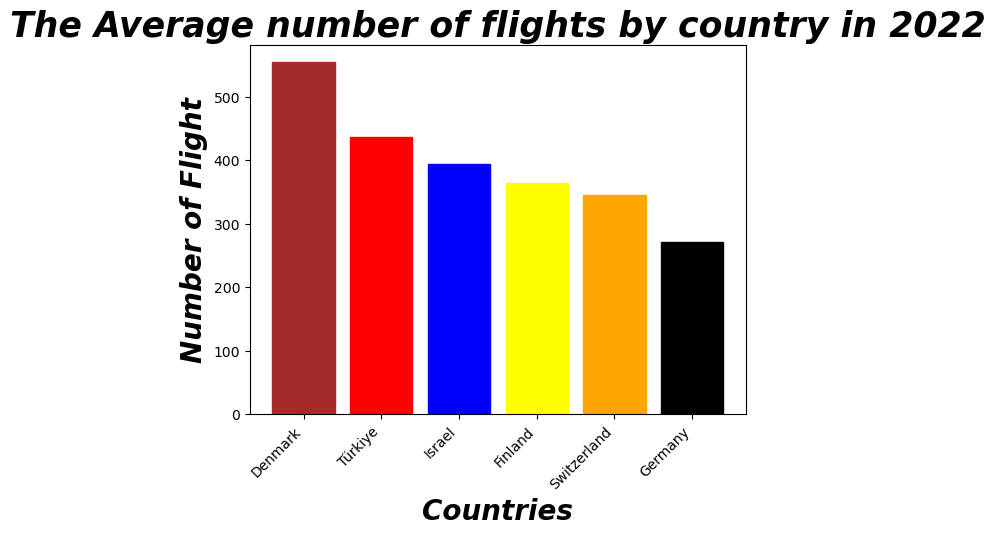

In [101]:
g=plt.bar(Country.index,Country.FLT_TOT_1,data=Country);
plt.title("The Average number of flights by country in 2022",weight="bold",style="italic",fontsize=25);
plt.xlabel("Countries",weight="bold",style="italic",fontsize=20);
plt.ylabel("Number of Flight",weight="bold",style="italic",fontsize=20);
plt.xticks(rotation=45,ha="right");
g[0].set_color("Brown");
g[1].set_color("red");
g[2].set_color("blue");
g[3].set_color("yellow");
g[4].set_color("orange");
g[5].set_color("black");
plt.show()

In [87]:
a=airport_flight_mean.head(6)

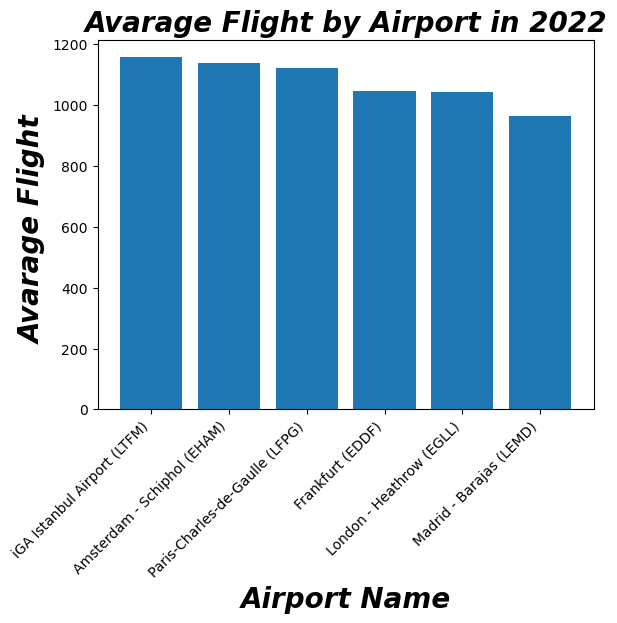

In [103]:
plt.bar(a.index,a.FLT_TOT_1,data=a);
plt.xlabel("Airport Name",weight="bold",style="italic",fontsize=20);
plt.ylabel("Avarage Flight ",weight="bold",style="italic",fontsize=20);
plt.xticks(rotation=45,ha="right");
plt.title("Avarage Flight by Airport in 2022",weight="bold",style="italic",fontsize=20);

In [114]:
year3

,FLT_TOT_1
MONTH_NUM,
1,126.481258
2,128.420325
3,87.370069
4,20.344020
5,22.657807
6,33.465047
7,66.440287
8,82.989666
9,75.826162


In [107]:
airport_flight.FLT_TOT_1.sum()

14356955

In [113]:
airport_flight["percantage"]=(airport_flight["FLT_TOT_1"]/ airport_flight["FLT_TOT_1"].sum())*100
airport_flight.head(3)

,FLT_TOT_1,percantage
Pivot_label,,
iGA Istanbul Airport (LTFM),422062,2.939774
Amsterdam - Schiphol (EHAM),415813,2.896248
Paris-Charles-de-Gaulle (LFPG),409376,2.851412


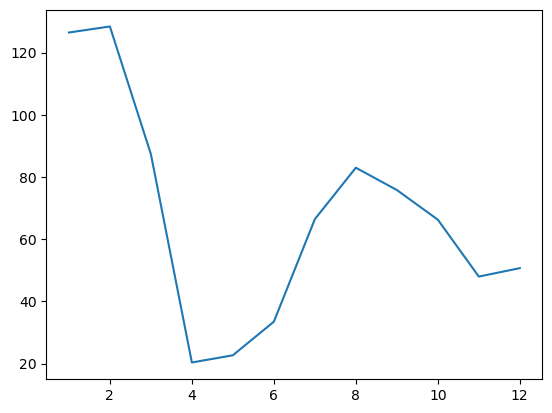

In [115]:
plt.plot(year3);
plt.grid();
plt.xlabel("months")

In [154]:

flightspandemic=df3[df3.YEAR==2020].groupby(["STATE_NAME","MONTH_NUM"])[["FLT_TOT_1"]].mean().sort_values(["MONTH_NUM","FLT_TOT_1"],ascending=[True,False])


In [155]:
flightspandemic

,,FLT_TOT_1
STATE_NAME,MONTH_NUM,
Denmark,1,616.741935
Finland,1,503.483871
Türkiye,1,400.698925
Israel,1,397.645161
Switzerland,1,387.655914
...,...,...
Slovakia,12,17.677419
Lithuania,12,15.009174
Montenegro,12,12.419355


In [156]:
Turkey=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Türkiye")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
Denmark=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Denmark")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
Israel=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Israel")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
Finland=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Finland")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
Switzerland=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Switzerland")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")


C:\Users\pc\AppData\Local\Temp\ipykernel_12316\2512757111.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Turkey=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Türkiye")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
C:\Users\pc\AppData\Local\Temp\ipykernel_12316\2512757111.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Denmark=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Denmark")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
C:\Users\pc\AppData\Local\Temp\ipykernel_12316\2512757111.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Israel=df3[(df3["YEAR"]==2020)& (df["STATE_NAME"]=="Israel")].groupby(["MONTH_NUM"])[["FLT_TOT_1"]].sum().sort_values("MONTH_NUM")
C:\Users\pc\AppData\Local\Temp\ipykernel_12316\2512757111.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Finland=df3[(df3["YEAR"]==2020)& (df

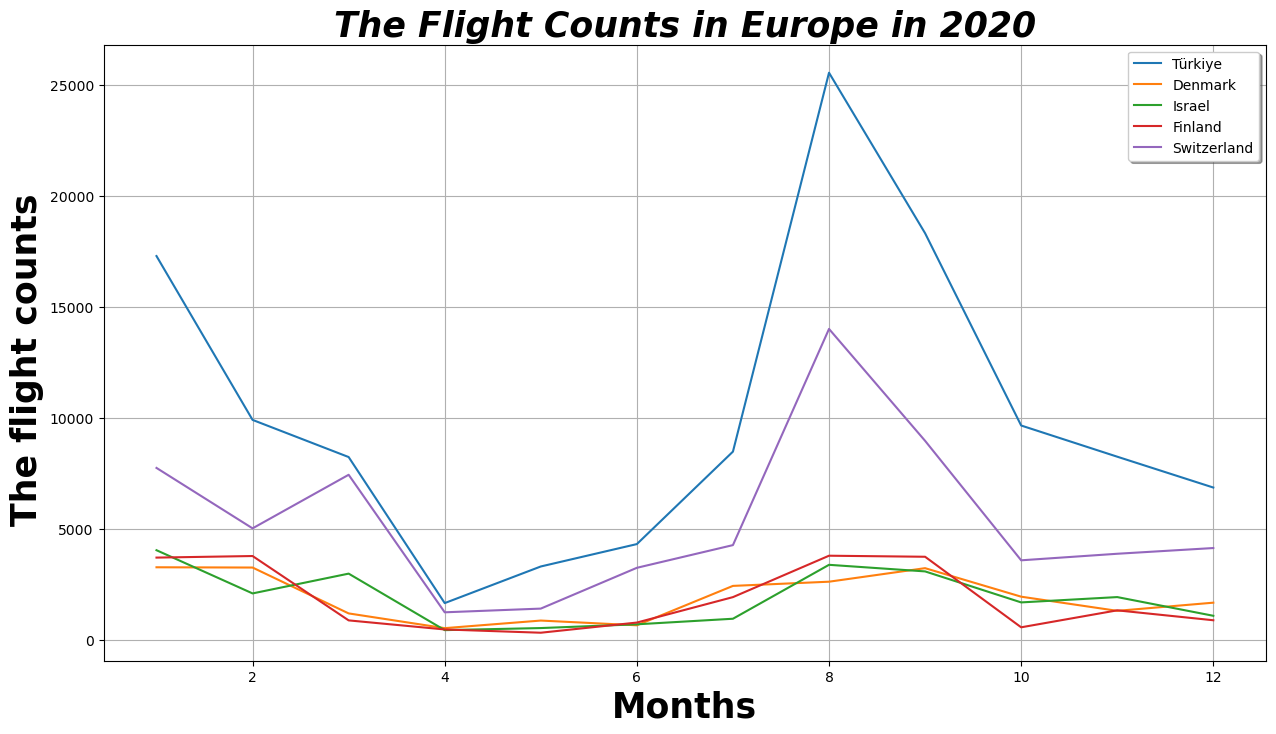

In [171]:
plt.figure(figsize=[15,8])
plt.plot(Turkey)
plt.plot(Denmark)
plt.plot(Israel)
plt.plot(Finland)
plt.plot(Switzerland)
plt.legend(["Türkiye","Denmark","Israel","Finland","Switzerland"],shadow=True);
plt.grid()
plt.xlabel("Months",weight="bold",fontsize="25");
plt.ylabel("The flight counts ",weight="bold",fontsize="25");
plt.title("The Flight Counts in Europe in 2020",weight="bold",style="italic",fontsize="25");

In [160]:
Turkey

,FLT_TOT_1
MONTH_NUM,
1,17303
2,9920
3,8246
4,1665
5,3315
6,4324
7,8491
8,25564
9,18332


In [161]:
df2.tail(2)

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot_label
114095,2022,12,DEC,2022-12-31,UDYZ,Yerevan,Armenia,49,51,100,NaN,NaN,NaN,Yerevan (UDYZ)
114096,2022,12,DEC,2022-12-31,UGTB,Tbilisi,Georgia,34,35,69,NaN,NaN,NaN,Tbilisi (UGTB)


In [170]:
flightssbydate.loc[2022,:].head(5)

,FLT_TOT_1
STATE_NAME,
Denmark,554.000000
Türkiye,436.329982
Israel,393.915068
Finland,363.564384
Switzerland,345.363385


In [172]:
flightsssbydate=df3.groupby(["YEAR","STATE_NAME"])[["FLT_TOT_1"]].sum().sort_values(["YEAR","FLT_TOT_1"],ascending=[True,False]).head(5)
flightsssbydate

FLT_TOT_1
YEAR STATE_NAME               
2018 Germany           2129836
     United Kingdom    2126049
     Spain             2072032
     France            1856031
     Italy             1203743